<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3.7 Neural Networks**
Important Topics:
* Mathematical Formulation
* Activation Functions
* Cost Function
* Backpropagation
* Backpropagation Algorithm

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#### **Mathematical Formulation**:
 * The values of layer $l$ are determined from layer $l − 1$, $w^l$ , $b^l$.
 * the general node in
the left-hand layer is labelled $j$ and one in the right-hand layer, layer $l$, is
labelled $j′$.
 * We want to calculate what value goes into the j′th node of the lth
layer.
* First multiply the value $a^{(l−1)}_j$ in the jth node of the previous, $(l − 1)^{th}$
, layer by the parameter $w^{(l)}_
{j, j′}$ and then add another parameter $b^{(l)}_
{j′}$
* Then we
add up all of these for every node in layer $l − 1$ . Let:\
$z^{(l)}_
{j′} =
∑^
{J_{l−1}}_
{j=1}
w^{(l)}_
{j, j′} a^{(l−1)}
_j + b^{(l)}_
{j′}  $
* where $J_I$ means the number of nodes in layer $l$. For a given activation function,
$σ$ , we end up with the following expression for the values in the next layer:\
$a^{(l)}_
{j′} =
σ (z^{(l)}_
{j′ })$.\
in Matrix form:\
$z^{(l)} = W^{(l)}a^{(l−1)} + b^{(l)}$,\
with the matrix $W^{(l)}$ containing all the multiplicative parameters, i.e. the
weights $w^{(l)}_
{j, j′} $, and $b^{(l)}$ is the bias. The bias is just the constant in the linear
transformation.\
$a^{(l)} =
σ
(
z^{(l)})
=
σ
(
W^{(l)}a^{(l−1)} + b^{(l)})
. $


#### **Activation Functions**:
* In neural networks, the activation function of a node abstracts the output of
that node given an input or set of inputs for specific purposes for example,
classification.
* **Step Function**
 * $σ (x) = 0$ if x < 0,\
  $σ (x) = 1$ if x ≥ 0.
  * also called the Heaviside step function, or the unit step function.
  * often
represents a signal that switches on at a specified time and stays switched on
indefinite
 * The step function can be use for classification problems
* **ReLU Function**
 * Positive linear/ReLU function is defined as\
$σ(x) = max(0, x)$
 * ReLU stands for Rectified Linear Units
 * The signal either passes through untouched or dies completely.
 * It was found to enable better training of deeper networks compared
to the widely used activation functions.
 * Rectified linear units, compared to
sigmoid function or similar activation functions, allow faster and effective
training of deep neural architectures on large and complex datasets
* **Sigmoid**
 * Sigmoid or logistic function\
$σ (x) = \frac{1}
{1 + e^{−x}} $.
 * The logistic function finds applications in a range of fields, including biomathematics
 * The logistic sigmoid can be used in the output layer for predicting
probability.
* **Softmax Function**
 * The softmax function converts a vector of numbers (an array of $K $values $(z)$
) into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector
 * It is thus a function
that turns several numbers into quantities that can be perhaps interpreted
as probabilities.\
$\frac{e^{z_k}}
{∑^K_{k=1} e^{z_k}}$
.
 * It is often used in the final, output, layer of a neural network, especially with
classification problems.

#### **Cost Functions**:
* In practice, we can use the least squares for a cost function.
* Since we will
have a set of independent input data $y^n$ (from the training dataset) and
corresponding output data $ŷ^n$ or the forecast output. $k$ is the k-th node of the output.
* We define the cost function as:\
$J = \frac{1}{2}∑^N_{n=1}∑^K_{K=1}
(ŷ^{(n)}_k − y^{(n)}_k)^2$
* For classification problems where only one output, the cost function commonly used for such an output is similar to logistic regression. And this is, for a binary classification $(y^{(n)} = 0, 1)$, the cost function is:\
$J = −∑^N_{n=1}(
y^{(n)} ln
(
ŷ^{(n)})
+ (1 − y^{(n)}) ln
(
1 − ŷ^{(n)}))$
* This is related to the cross entropy function.


#### **Backpropagation**:
* The practice
of fine-tuning the weights of a neural network based on the error rate (i.e.
loss) obtained in the previous iteration.
* We want to minimize the cost function, J , with respect to the parameters,
the components of **$W$** and **$b$**
 * To do that using gradient descent we are going
to need the derivatives of $J$ with respect to each of those parameters.
 * Here
we focus the layer $l$ and node $j′$ and node j from layer $l − 1$.
 * It can be derived that
 $\frac{∂ J}
{∂ w^{(l)}_
{j, j′}}
=
\frac{∂ J}
{∂ z^{(l)}_
{j′}}
\frac{∂ z^{(l)}_
{j′}}
{∂ w^{(l)}_
{j, j′}}
=
δ ^{(l)}_
{j′} a^{(l−1)}_
j$ . , $δ ^{(l)}_
{j′} =
\frac{∂ J}{
∂ z^{(l)}_
j}$
* Now the derivatives of the cost function, J, to the ws can be written in terms
of the
δ s which in turn are backpropagated from the network layers that
are just to the right, one nearer the output.
* The derivatives of the cost
function to the bias, b is quite simple:
$\frac{∂ J}{
∂ b^{(l)}_
{j′}}
=
δ^{(l)}_
{j′} $
 * It is clear that the derivatives of J is depending on which activation function
we use
  * If it is ReLU then the derivative is either zero or one. If we use the
logistic function then we find that
$σ ′(z) =
σ (1 −
σ )$.


#### **Backpropagation Algorithm**:
* We can easily derive the backpropagation algorithm as follows:

 *  First we initialize weights and biases, typically at random
 * Then pick
input data and input the vector x into the left side of the network, and calculate all the $z_s$, $a_s$, etc.
 * Finally calculate the output $ŷ$
* For example if using the quadratic cost function in one dimension, then:
 * $δ^{(L)} = \frac{dg^{(L)}}{
dz} |_{z_j^{(L)}}
( ŷ − y)$
 * Continue to the left:\
 $δ^ {(l−1)}_
j = \frac{dg^{(l−1)}}
{dz} |_{z_j^{(l−1)}}
∑_
j
δ^{(l)}_
{j′} w^{(l)}_
{j, j′} $
 * Then update the weights and biases using the following formulas.\
 New $w^{(l)}_
{j, j′}$ = Old $w^{(l)}_
{j, j′} −
β\frac{∂ J}{
∂ w^{(l)}_
{j, j′}}$
= Old $w^{(l)}_
{j, j′} −
β δ^{(l)}_
{j′} a^{(l−1)}_
j$\
and\
New $b^{(l)}_
{j′}$ = Old $b^{(l)}_
{j′} −
β \frac{∂ J}
{∂ b^{(l)}_
{j′}}
$= Old $b^{(l)}_
{j′} −
β δ^{(l)}
_{j′}$ .




Epoch 1/10
13/13 [==============================] - 1s 18ms/step - loss: 0.5313 - accuracy: 0.7990 - val_loss: 0.3382 - val_accuracy: 0.9708
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2912 - accuracy: 0.9447 - val_loss: 0.2018 - val_accuracy: 0.9766
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1883 - accuracy: 0.9573 - val_loss: 0.1433 - val_accuracy: 0.9649
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1362 - accuracy: 0.9623 - val_loss: 0.1162 - val_accuracy: 0.9649
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1071 - accuracy: 0.9749 - val_loss: 0.1032 - val_accuracy: 0.9649
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0889 - accuracy: 0.9824 - val_loss: 0.0967 - val_accuracy: 0.9708
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0778 - accuracy: 0.9849 - val_loss: 0.0947 - val_accuracy: 0.9649
Epoch 8/10
13/13 [=

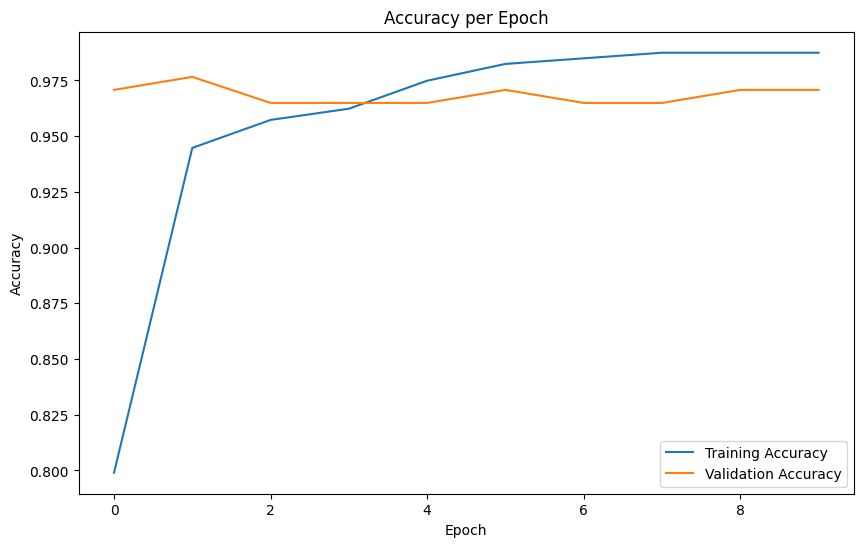

In [22]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#standardizing to make better for Neural Network

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),      # 64 neurons , ReLU
    keras.layers.Dense(32, activation='relu'),      # 32 neurons , ReLU
    keras.layers.Dense(1, activation='sigmoid')     # Output layer 1 neuron , and sigmoid activation
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()